## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df = pd.read_csv("sales_dataset.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Checking test dataset

In [3]:
df.shape

(8523, 12)

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Categorical data columns
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [6]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [7]:
df.duplicated().any()

np.False_

In [8]:
#identify unique values
df.apply(lambda x: len(x.unique()))

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


In [9]:
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns:', cat_cols)
print('Numerical Columns:', num_cols)

Categorical Columns: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
#exploring Categories
for col in cat_cols:
    print('--------------------------')
    print('Series:', col)
    print('--------------------------')
    print(df[col].value_counts())
    print('\n')

--------------------------
Series: Item_Identifier
--------------------------
Item_Identifier
FDW13    10
FDG33    10
NCF42     9
FDW26     9
FDX31     9
         ..
FDY43     1
FDO33     1
FDK57     1
FDQ60     1
FDN52     1
Name: count, Length: 1559, dtype: int64


--------------------------
Series: Item_Fat_Content
--------------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


--------------------------
Series: Item_Type
--------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 

In [11]:
#fill the missing values for numerical terms-mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [12]:
#fill the missing values for categorical terms-mode
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values = df['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
df.loc[missing_values, 'Outlet_Size']= df.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x].Outlet_Size)
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [16]:
# replace Item_Visibility
print('Total 0s before replace', sum(df['Item_Visibility']==0))
df.loc[:, 'Item_Visibility'].replace(to_replace=0, value = df['Item_Visibility'].mean(),inplace=True)
print('Total 0s after replace:', sum(df['Item_Visibility']==0))

Total 0s before replace 526
Total 0s after replace: 0


In [17]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [18]:
sns.set()

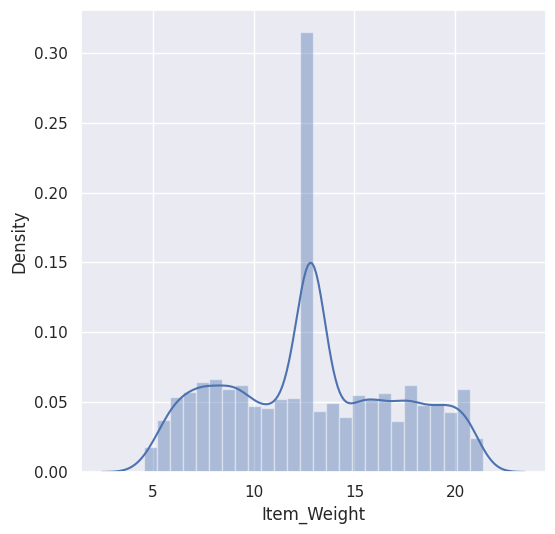

In [19]:
# Item_weight
plt.figure(figsize =(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

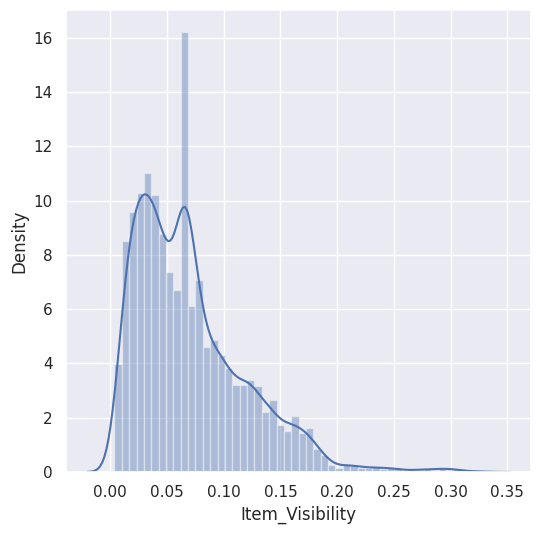

In [20]:
plt.figure(figsize =(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

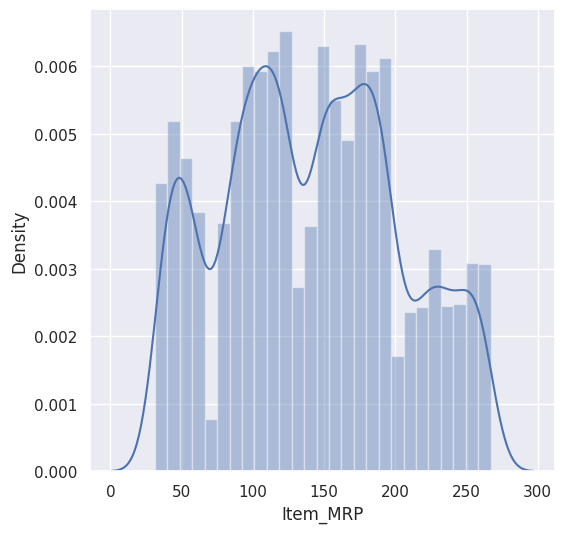

In [21]:
plt.figure(figsize =(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

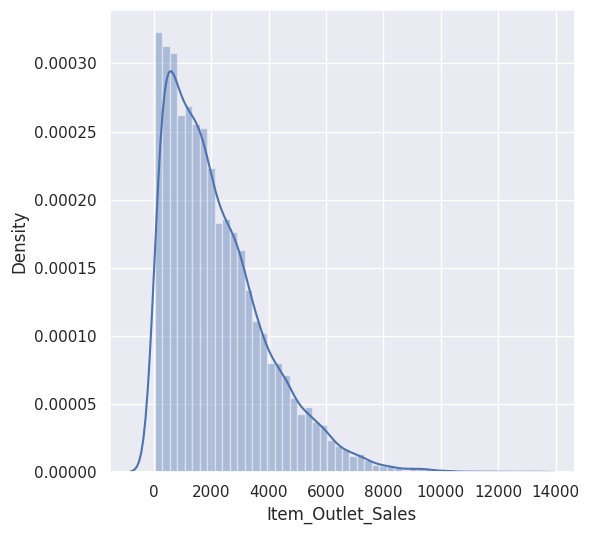

In [22]:
plt.figure(figsize =(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

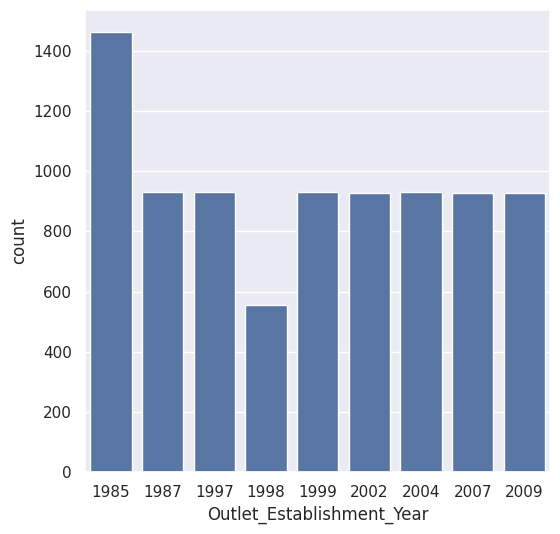

In [23]:
plt.figure(figsize =(6,6))
sns.countplot(x= 'Outlet_Establishment_Year', data = df)
plt.show()

In [24]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

,Outlet_Years
0,14
1,4
2,14
3,15
4,26
...,...
8518,26
8519,11
8520,9
8521,4


In [25]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14


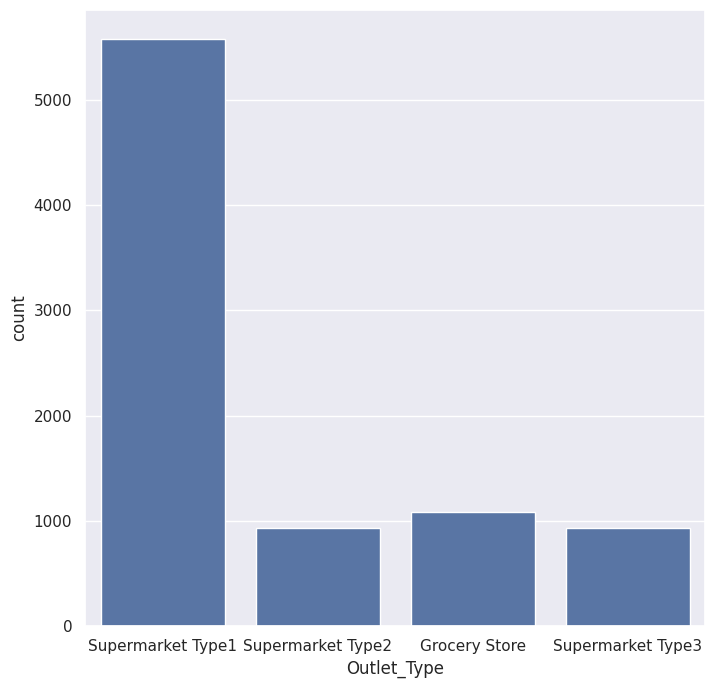

In [26]:
plt.figure(figsize =(8,8))
sns.countplot(x= 'Outlet_Type', data = df)
plt.show()

In [27]:
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [28]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({'LF': 'Low Fat', 'reg': 'regular', 'low fat': 'Low Fat', 'regular': 'Regular'})
df["Item_Fat_Content"].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,2889
regular,117


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

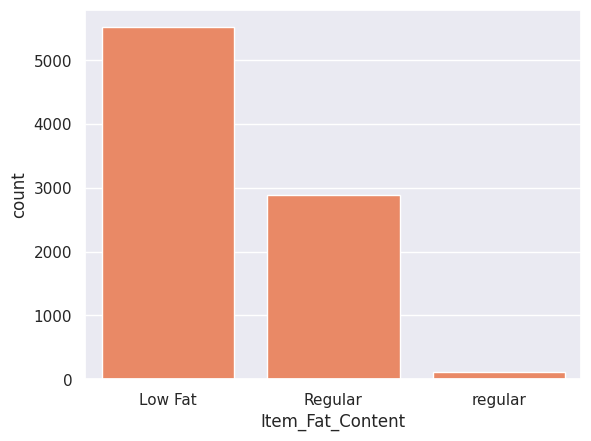

In [29]:
sns.countplot(x = 'Item_Fat_Content', data = df, color = 'Coral')

<Axes: xlabel='Item_Type', ylabel='count'>

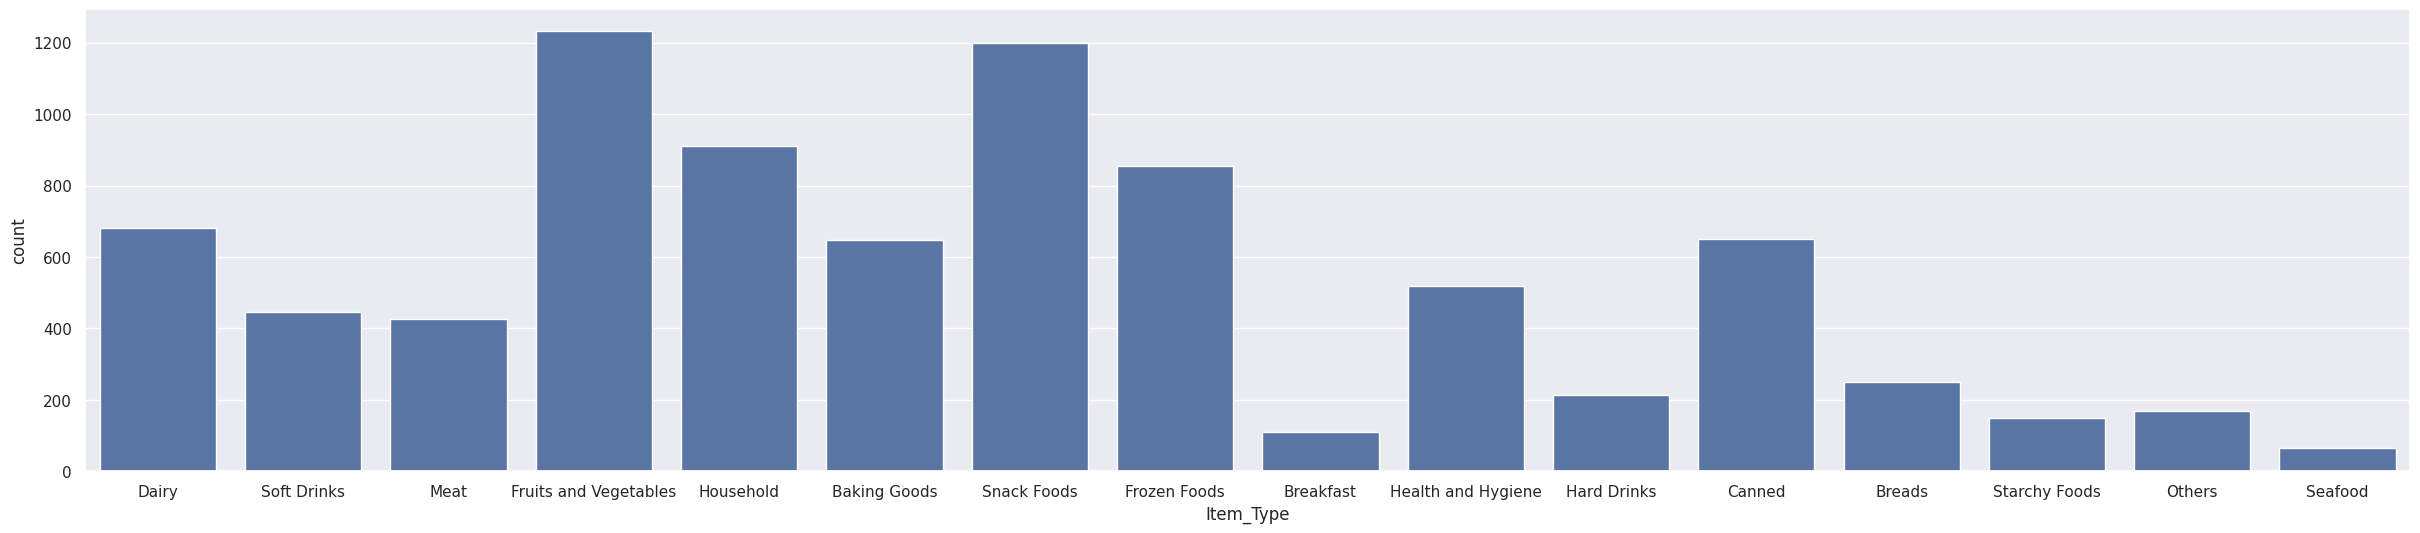

In [30]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type', data = df)

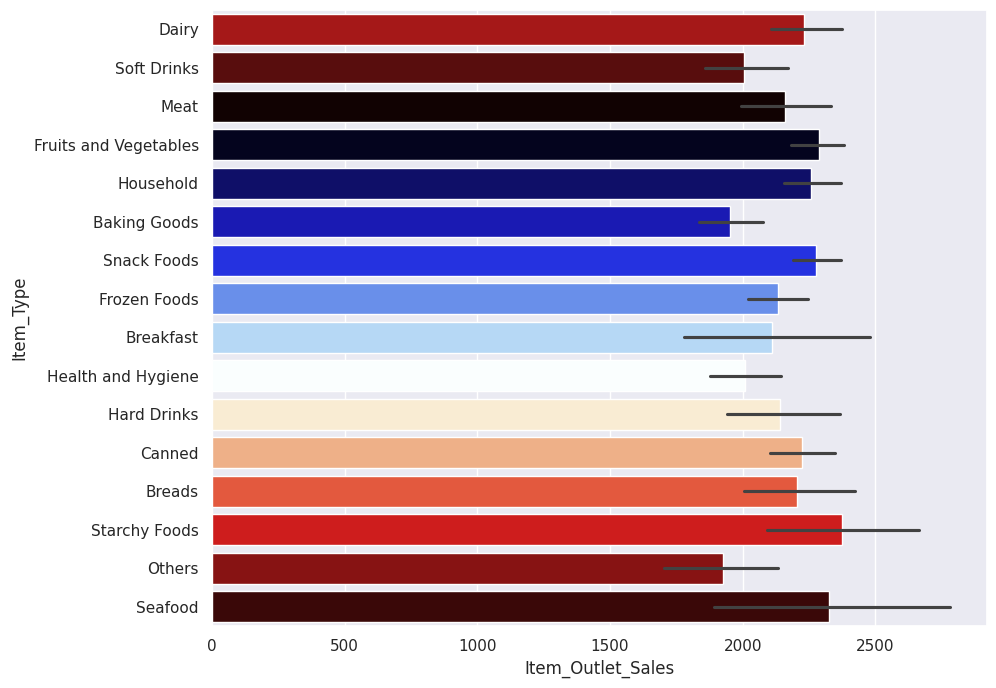

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=df, palette='flag')
plt.show()



## Note:
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<Axes: xlabel='Outlet_Type', ylabel='count'>

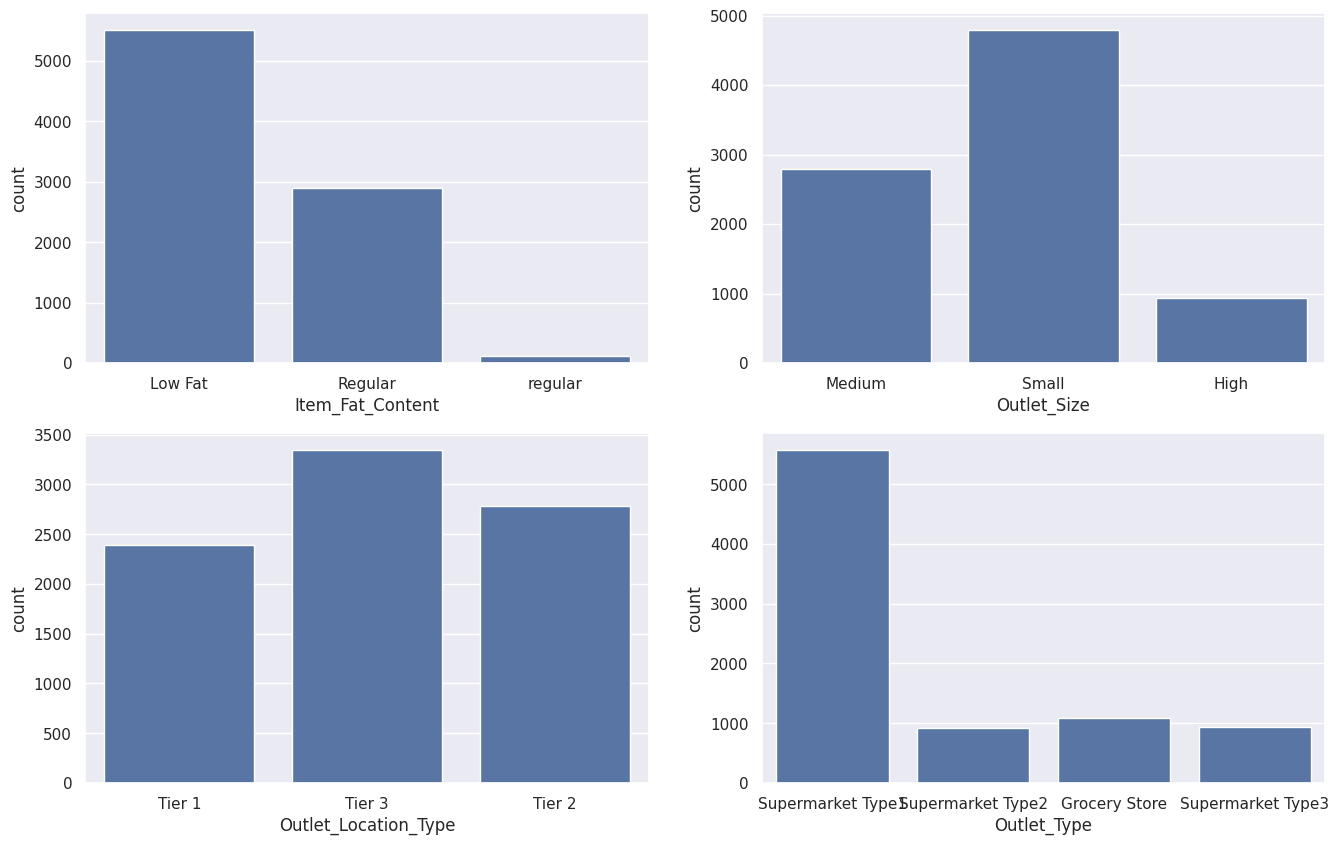

In [32]:
fig,ax = plt.subplots(2,2,figsize=(16,10))
sns.countplot(x='Item_Fat_Content', data = df, ax=ax[0][0])
sns.countplot(x='Outlet_Size', data = df, ax=ax[0][1])
sns.countplot(x='Outlet_Location_Type', data = df, ax=ax[1][0])
sns.countplot(x='Outlet_Type', data = df, ax=ax[1][1])

## Note:
- The Outlets are more of Supermarket Type1.
- But sales are more on Type 3
- The Outlet Sales tend to be high for Tier3 and Tier 2 location types
- But we have only Tier3 locations maximum Outlets
- The Tier-3 location type has all types of Outlet type and has high sales margin.

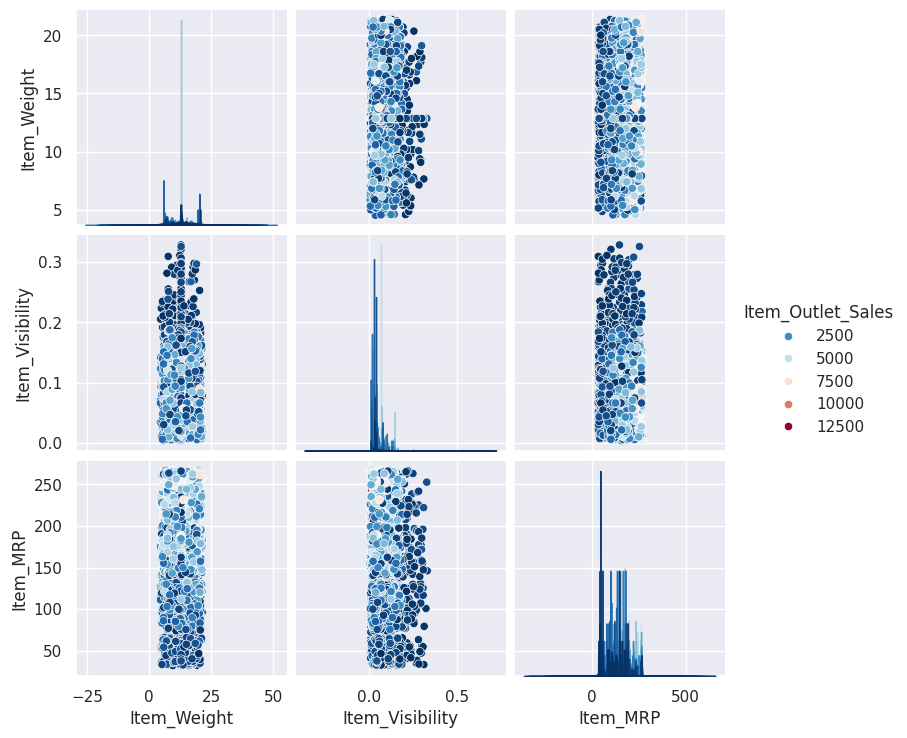

In [33]:
sns.pairplot(
    df, vars = [ 'Item_Weight', 'Item_Visibility', 'Item_MRP'],
    hue = "Item_Outlet_Sales",
    palette = 'RdBu_r'
);

In [35]:
#Correlation with Target column
corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.567574
Outlet_Years,0.049135
Item_Weight,0.011550
Outlet_Establishment_Year,-0.049135
Item_Visibility,-0.134138


<Axes: >

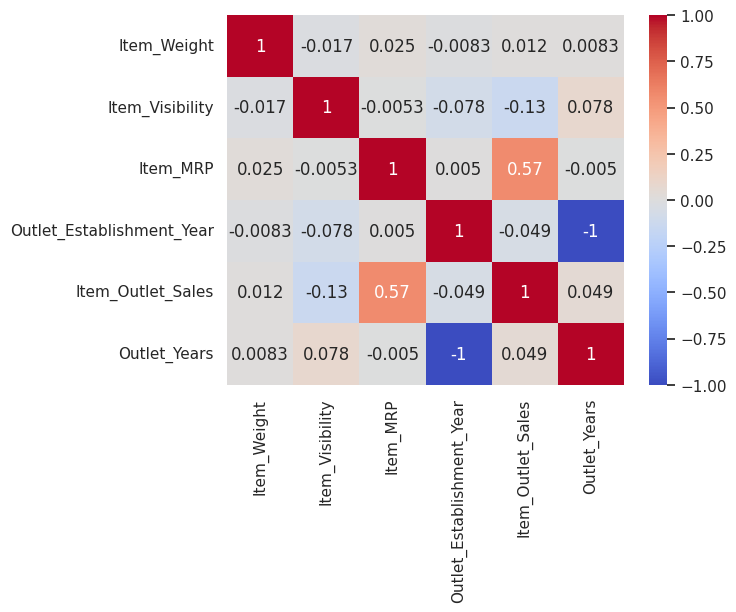

In [36]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Note:
 We can see Item_Outlet_Sales is highly correlated with Item_MRP, that means if Item_MRP increases, Item_Outlet_Sales increases.

## Label Encoding

In [37]:
# Transform non-numerical to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier']

for col in cols_to_encode:
    df[col]= le.fit_transform(df[col])

In [38]:
# applying one hot encoding
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,True,...,False,True,False,True,False,False,False,True,False,False
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,4,False,...,False,True,False,False,False,True,False,False,True,False
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,True,...,False,True,False,True,False,False,False,True,False,False
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,15,False,...,False,False,True,False,False,True,True,False,False,False
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,26,True,...,True,False,False,False,False,True,False,True,False,False


## Input-Output variable

In [40]:
y = df['Item_Outlet_Sales']
x = df.drop('Item_Outlet_Sales', axis=1)

## Machine learning Model Training

In [41]:
model_scores= pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [43]:
def models(model_name, model, x, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)

    # apply scaling on training data and train the model
    pipeline.fit(x_train, y_train)

    # predict the validation set
    y_pred = pipeline.predict(x_test)

    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_score = r2_score(y_test, y_pred)

    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]

    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

In [44]:
lreg= LinearRegression()
models('Linear Regression', lreg, x, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1067.4518446662262
R2 Score:  0.5807704232373319


In [45]:
ridge_model = Ridge()
models('Ridge', ridge_model, x, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  1067.737207053453
R2 Score:  0.5805462476099168


In [46]:
lasso_model= Lasso()
models('Lasso', lasso_model, x, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1069.0006124396307
R2 Score:  0.5795530188385061


In [47]:
svr_model = SVR()
models('SVR', svr_model, x, y)

----------------------------------
SVR  Report:
----------------------------------
RMSE:  1593.4835971637551
R2 Score:  0.06577706442857334


In [48]:
dtr_model = DecisionTreeRegressor()
models('Decision Tree', dtr_model, x, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1511.3849464572381
R2 Score:  0.15956232026462935


In [49]:
rfr_model = RandomForestRegressor()
models('Random Forest', rfr_model, x, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1090.0454430777056
R2 Score:  0.5628358521793733


In [50]:
xgbr_model = XGBRegressor()
models('XGBoost', xgbr_model, x, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1130.013957244835
R2 Score:  0.5301892543807033


In [51]:
model_scores

,model,rmse,r2_score
0,Linear Regression,1067.451845,0.580770
1,Ridge,1067.737207,0.580546
2,Lasso,1069.000612,0.579553
3,SVR,1593.483597,0.065777
4,Decision Tree,1511.384946,0.159562
5,Random Forest,1090.045443,0.562836
6,XGBoost,1130.013957,0.530189


## Notes:
Based on the model score table, the model that fits this problem that presents the lowest root mean squared error and highest scores id Ridge and linear regression model.